In [2]:
import numpy as np
from scipy.linalg import solve
import pandas as pd


## 1

In [76]:

# Define the possible first and last states
first_states = [800, 950, 1100]
last_states = [1650, 1700, 1800]

# Define the fixed market states in the middle
middle_states = [1187.5, 1225, 1300, 1362.5, 1412.5, 1500, 1575]

# Combine first, middle, and last states to construct the full list of states
# Placeholder for the payoff matrices
payoff_matrices = []

# Strike prices for the put and call options
strike_prices = {
    "P1175": 1175,
    "P1200": 1200,
    "P1250": 1250,
    "P1350": 1350,
    "C1350": 1350,
    "C1375": 1375,
    "C1450": 1450,
    "C1550": 1550,
    "C1600": 1600
}

P_t0 = np.array([46.60, 51.55, 63.30, 95.30, 99.55, 84.90, 47.25, 15.80, 7.90])

# Function to calculate payoff matrix for a given combination of first and last states
def calculate_payoff_matrix(first, last):
    # Full list of market states for this specific combination
    market_states = [first] + middle_states + [last]
    
    # Initialize payoff matrix
    payoff_matrix = []
    
    # Calculate payoffs for each option in each market state
    for option, strike in strike_prices.items():
        row = []
        if option.startswith("P"):  # Put option
            row = [max(strike - s, 0) for s in market_states]
        elif option.startswith("C"):  # Call option
            row = [max(s - strike, 0) for s in market_states]
        payoff_matrix.append(row)
    
    return market_states, np.array(payoff_matrix)

def numpy_to_latex_matrix(array, name="Matrix"):
    """
    Converts a NumPy array to a LaTeX formatted matrix string.
    
    Parameters:
        array (np.ndarray): The NumPy array to convert.
        name (str): The name or title of the matrix for LaTeX display.
    
    Returns:
        str: A LaTeX formatted string representing the matrix.
    """
    latex_matrix = f"{name}\n\\[\n\\begin{{bmatrix}}\n"
    for row in array:
        latex_matrix += " & ".join(map(str, row)) + " \\\\\n"
    latex_matrix += "\\end{bmatrix}\n\\]\n"
    return latex_matrix

def vector_to_latex_row(vector):
    """
    Converts a NumPy vector to a LaTeX formatted row vector string without using section headers.
    
    Parameters:
        vector (np.ndarray): The NumPy array representing the vector.
    
    Returns:
        str: A LaTeX formatted string representing the row vector.
    """
    latex_row_vector = "\\[\n\\begin{bmatrix} "
    latex_row_vector += " & ".join(f"{v:.4f}" for v in vector)  # Format each element to 4 decimal places
    latex_row_vector += " \\end{bmatrix}\n\\]\n"
    return latex_row_vector

# Loop over each combination of first and last states
for first in first_states:
    for last in last_states:
        market_states, payoff_matrix = calculate_payoff_matrix(first, last)
        payoff_matrices.append(payoff_matrix)
        # print(f"Payoff matrix for first state {first} and last state {last}:\n{payoff_matrix}\n")
        print(numpy_to_latex_matrix(payoff_matrix, "\\subsection{" + f"Payoff matrix with market states {first} and {last}" + "}"))
        Q = solve(payoff_matrix, P_t0) 
        print("State price vector transposed:", vector_to_latex_row(Q))
        print("Arbitrage free, i.e. all positive?", (Q>0).all(), end="\n\n")

print(vector_to_latex_row(P_t0))

\subsection{Payoff matrix with market states 800 and 1650}
\[
\begin{bmatrix}
375.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
400.0 & 12.5 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
450.0 & 62.5 & 25.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
550.0 & 162.5 & 125.0 & 50.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 12.5 & 62.5 & 150.0 & 225.0 & 300.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 37.5 & 125.0 & 200.0 & 275.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 50.0 & 125.0 & 200.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 25.0 & 100.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 50.0 \\
\end{bmatrix}
\]

State price vector transposed: \[
\begin{bmatrix} 0.1243 & 0.1475 & -0.0735 & 0.2435 & 0.1060 & 0.0620 & 0.3130 & 0.0000 & 0.1580 \end{bmatrix}
\]

Arbitrage free, i.e. all positive? False

\subsection{Payoff matrix with market states 800 and 1700}
\[
\begin{bmatrix}
375.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
400.0 & 12.5 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 &

In [10]:
[np.linalg.cond(matrix) for matrix in payoff_matrices]

[382.0474787788935,
 382.0474787788935,
 382.0474787788935,
 265.305954466555,
 287.5038071950207,
 362.6131112158303,
 265.7765883169299,
 299.8725964070577,
 378.21320076562597]

## 2

In [185]:
import numpy as np
from scipy.linalg import solve

# Payoff matrix M (6 options, 6 market states)
M = np.array([
    [150, 0, 0, 0, 0, 0],       # Put 900
    [300, 75, 0, 0, 0, 0],       # Put 1050
    [450, 225, 75, 0, 0, 0],     # Put 1200
    [0, 0, 0, 37.5, 112.5, 200], # Call 1200
    [0, 0, 0, 0, 37.5, 125],     # Call 1275
    [0, 0, 0, 0, 0, 50]          # Call 1350
])

# Price vector P
P = np.array([3.75, 14.75, 54.9, 53.8, 22.3, 6.8])

# Solving MQ = P for Q
Q = solve(M, P)

Q


array([0.025     , 0.09666667, 0.292     , 0.28533333, 0.14133333,
       0.136     ])

In [ ]:
# Sample market states (replace with actual market states if different)
market_states = [750, 975, 1125, 1237.5, 1312.5, 1400]

# Dictionary of options with their respective bid and ask prices
options_data = {
    "Option": [
        "1175 Call", "1200 Call", "1225 Call", "1250 Call", "1275 Call",
        "1300 Call", "1325 Call", "1350 Call", "1375 Call", "1400 Call",
        "1425 Call", "1450 Call", "1475 Call", "800 Put", "900 Put",
        "950 Put", "995 Put", "1025 Put", "1050 Put", "1060 Put",
        "1075 Put", "1100 Put", "1150 Put", "1175 Put", "1200 Put"
    ],
    "Bid": [
        68, 52.8, 40.3, 29.6, 21.3, 15, 10, 6.3, 4, 2.5,
        1.4, 0.8, 0.35, 1.2, 3.4, 5.3, 8.5, 11.1, 14, 15.7,
        18, 22.7, 35.3, 44.1, 53.9
    ],
    "Ask": [
        70, 54.8, 42.3, 31.6, 23.3, 16.2, 11, 7.3, 4.7, 3.2,
        1.85, 1.25, 0.8, 1.65, 4.1, 6.3, 9.5, 12.6, 15.5, 17.2,
        19.5, 24.7, 37.3, 46.1, 55.9
    ]
}

used_options = ["1200 Call", "1275 Call", "1350 Call", "900 Put", "1050 Put", "1200 Put"]

# Extracting the strike from the option name
strikes = {option: int(option.split(' ')[0]) for option in options_data['Option']}

# Calculate market mid prices for each option
market_prices = {option: (bid + ask) / 2 for option, bid, ask in zip(options_data['Option'], options_data['Bid'], options_data['Ask'])}

# Filter out the used options and calculate payoffs for the remaining options
filtered_options = {k: v for k, v in strikes.items() if k not in used_options}
payoffs = {}
for option, strike in filtered_options.items():
    if 'Call' in option:
        payoffs[option] = [max(ms - strike, 0) for ms in market_states]
    else:  # 'Put'
        payoffs[option] = [max(strike - ms, 0) for ms in market_states]

# Initialize the DataFrame with option information
df_options = pd.DataFrame({
    'Type': [opt.split()[1] for opt in filtered_options.keys()],
    'Strike': [filtered_options[opt] for opt in filtered_options.keys()],
    'Bid': [options_data['Bid'][options_data['Option'].index(opt)] for opt in filtered_options.keys()],
    'Ask': [options_data['Ask'][options_data['Option'].index(opt)] for opt in filtered_options.keys()],
    'Mid': [market_prices[opt] for opt in filtered_options.keys()],
})

# Extract payoffs into separate columns for each market state
for i, state in enumerate(market_states):
    df_options[str(state)] = [payoffs[opt][i] for opt in filtered_options.keys()]

# Initialize the list to hold all payoffs
payoff_list = [payoffs[option] for option in filtered_options.keys()]

# Convert list of lists into a NumPy array to form the payoff matrix
payoff_matrix = np.array(payoff_list)
estimated_prices = np.dot(payoff_matrix, Q)
df_options['Int'] = estimated_prices
df_options = df_options.sort_values("Type", ascending=False).sort_values("Strike")
df_options[r"D $\%$"] = (df_options['Int'] - df_options['Mid']).abs()/df_options['Mid']*100
print(df_options.to_latex(index=False, float_format="%.2f"))


\begin{tabular}{lrrrrrrrrrrrr}
\toprule
Type & Strike & Bid & Ask & Mid & 750 & 975 & 1125 & 1237.5 & 1312.5 & 1400 & Int & D $\%$ \\
\midrule
Put & 800 & 1.20 & 1.65 & 1.42 & 50 & 0 & 0 & 0.00 & 0.00 & 0 & 1.25 & 12.28 \\
Put & 950 & 5.30 & 6.30 & 5.80 & 200 & 0 & 0 & 0.00 & 0.00 & 0 & 5.00 & 13.79 \\
Put & 995 & 8.50 & 9.50 & 9.00 & 245 & 20 & 0 & 0.00 & 0.00 & 0 & 8.06 & 10.46 \\
Put & 1025 & 11.10 & 12.60 & 11.85 & 275 & 50 & 0 & 0.00 & 0.00 & 0 & 11.71 & 1.20 \\
Put & 1060 & 15.70 & 17.20 & 16.45 & 310 & 85 & 0 & 0.00 & 0.00 & 0 & 15.97 & 2.94 \\
Put & 1075 & 18.00 & 19.50 & 18.75 & 325 & 100 & 0 & 0.00 & 0.00 & 0 & 17.79 & 5.11 \\
Put & 1100 & 22.70 & 24.70 & 23.70 & 350 & 125 & 0 & 0.00 & 0.00 & 0 & 20.83 & 12.10 \\
Put & 1150 & 35.30 & 37.30 & 36.30 & 400 & 175 & 25 & 0.00 & 0.00 & 0 & 34.22 & 5.74 \\
Put & 1175 & 44.10 & 46.10 & 45.10 & 425 & 200 & 50 & 0.00 & 0.00 & 0 & 44.56 & 1.20 \\
Call & 1175 & 68.00 & 70.00 & 69.00 & 0 & 0 & 0 & 62.50 & 137.50 & 225 & 67.87 & 1.64 \\
Ca

In [193]:
options_data = {
    "Option": [
        "1175 Call", "1225 Call", "1250 Call",
        "1300 Call", "1325 Call", "1375 Call",
        "1400 Call", "1425 Call", "1450 Call",
        "1475 Call", "800 Put", "950 Put",
        "995 Put", "1025 Put", "1060 Put",
        "1075 Put", "1100 Put", "1150 Put",
        "1175 Put"
    ],
    "Strike": [
        1175, 1225, 1250, 1300, 1325, 1375, 1400, 1425, 1450, 1475,
        800, 950, 995, 1025, 1060, 1075, 1100, 1150, 1175
    ],
    "Bid": [
        68, 40.3, 29.6, 15, 10, 4, 2.5, 1.4, 0.8, 0.35,
        1.2, 5.3, 8.5, 11.1, 15.7, 18, 22.7, 35.3, 44.1
    ],
    "Ask": [
        70, 42.3, 31.6, 16.2, 11, 4.7, 3.2, 1.85, 1.25, 0.8,
        1.65, 6.3, 9.5, 12.6, 17.2, 19.5, 24.7, 37.3, 46.1
    ]
}

# Calculate market mid prices and interpolated prices
df_options = pd.DataFrame(options_data)
df_options['Mid'] = (df_options['Bid'] + df_options['Ask']) / 2

# Compute payoffs for each option at each market state
payoff_matrix = np.array([
    [max(ms - strike, 0) if 'Call' in option else max(strike - ms, 0)
     for ms in market_states] for option, strike in zip(df_options['Option'], df_options['Strike'])
])

# Calculate interpolated prices using the dot product of M and Q
df_options['Int'] = payoff_matrix.dot(Q)

# Add payoff columns to the DataFrame
for idx, state in enumerate(market_states):
    df_options[f'{state}'] = payoff_matrix[:, idx]

# Generate LaTeX code
latex_code = df_options.to_latex(index=False, columns=[
    'Option', 'Strike', 'Mid', 'Int',
    '750', '975', '1125', '1237.5', '1312.5', '1400'
], float_format="%.2f", escape=False)

# Print the LaTeX code with smaller font
print('\\begin{table}[h]')
print('    \\centering')
print('    \\caption{Detailed Option Payoffs and Prices}')
print('    \\small')  # You can also use \\footnotesize for even smaller text
print(latex_code)
print('\\end{table}')

ValueError: shapes (19,8) and (6,) not aligned: 8 (dim 1) != 6 (dim 0)

In [189]:
# Calculate the sum of absolute differences between market and interpolated prices
sum_absolute_differences = np.sum(np.abs(df_options['Mid'] - df_options['Int']))

print("Sum of Absolute Differences:", sum_absolute_differences)

KeyError: 'Int'

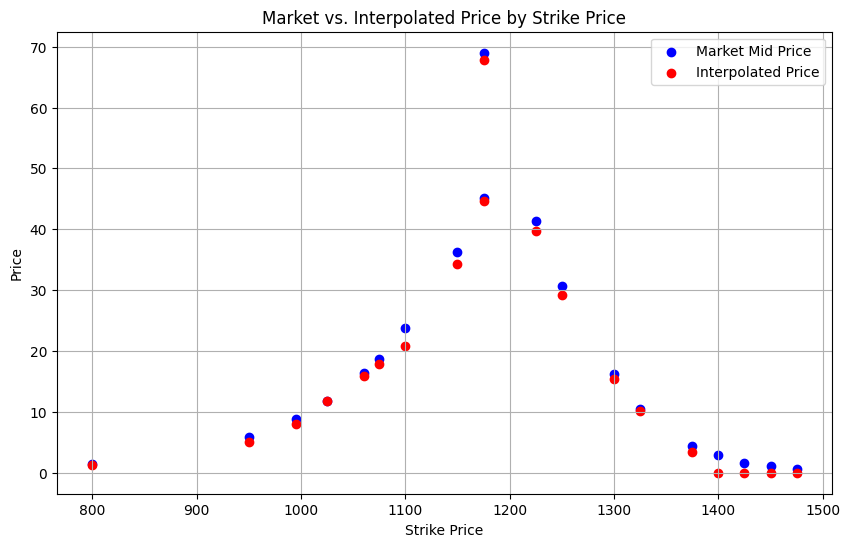

Number of instruments: 19


In [190]:
import matplotlib.pyplot as plt

# Example data setup (Please replace with actual DataFrame if different)
df = pd.DataFrame({
    'Option': ["Dec 1175 Call", "Dec 1225 Call", "Dec 1250 Call", "Dec 1300 Call", "Dec 1325 Call",
               "Dec 1375 Call", "Dec 1400 Call", "Dec 1425 Call", "Dec 1450 Call", "Dec 1475 Call",
               "Dec 800 Put", "Dec 950 Put", "Dec 995 Put", "Dec 1025 Put", "Dec 1060 Put",
               "Dec 1075 Put", "Dec 1100 Put", "Dec 1150 Put", "Dec 1175 Put"],
    'Strike': [1175, 1225, 1250, 1300, 1325, 1375, 1400, 1425, 1450, 1475,
               800, 950, 995, 1025, 1060, 1075, 1100, 1150, 1175],
    'Market Mid Price': [69.00, 41.30, 30.60, 16.20, 10.50, 4.35, 2.85, 1.63, 1.03, 0.58,
                         1.43, 5.80, 8.75, 11.85, 16.45, 18.75, 23.70, 36.30, 45.10],
    'Interpolated Price': [67.86, 39.73, 29.23, 15.37, 10.20, 3.40, 0.00, 0.00, 0.00, 0.00,
                           1.25, 5.00, 8.06, 11.71, 15.97, 17.80, 20.84, 34.22, 44.56]
})

# Plot the Market Mid Price and Interpolated Price vs. Strike Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Strike'], df['Market Mid Price'], color='blue', label='Market Mid Price')
plt.scatter(df['Strike'], df['Interpolated Price'], color='red', label='Interpolated Price')
plt.title('Market vs. Interpolated Price by Strike Price')
plt.xlabel('Strike Price')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Counting the instruments
number_of_instruments = len(df)
print("Number of instruments:", number_of_instruments)



In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the DataFrame (assuming the DataFrame setup as described earlier)
df = pd.DataFrame({
    'Option': [
        "Dec 1175 Call", "Dec 1225 Call", "Dec 1250 Call", "Dec 1300 Call", "Dec 1325 Call",
        "Dec 1375 Call", "Dec 1400 Call", "Dec 1425 Call", "Dec 1450 Call", "Dec 1475 Call",
        "Dec 800 Put", "Dec 950 Put", "Dec 995 Put", "Dec 1025 Put", "Dec 1060 Put",
        "Dec 1075 Put", "Dec 1100 Put", "Dec 1150 Put", "Dec 1175 Put"
    ],
    'Strike': [
        1175, 1225, 1250, 1300, 1325, 1375, 1400, 1425, 1450, 1475,
        800, 950, 995, 1025, 1060, 1075, 1100, 1150, 1175
    ],
    'Bid': [
        68, 40.3, 29.6, 15, 10, 4, 2.5, 1.4, 0.8, 0.35,
        1.2, 5.3, 8.5, 11.1, 15.7, 18, 22.7, 35.3, 44.1
    ],
    'Ask': [
        70, 42.3, 31.6, 16.2, 11, 4.7, 3.2, 1.85, 1.25, 0.8,
        1.65, 6.3, 9.5, 12.6, 17.2, 19.5, 24.7, 37.3, 46.1
    ],
    'Interpolated Price': [67.86, 39.73, 29.23, 15.37, 10.20, 3.40, 0.00, 0.00, 0.00, 0.00,
                           1.25, 5.00, 8.06, 11.71, 15.97, 17.80, 20.84, 34.22, 44.56]
})
df['Market Mid Price'] = (df['Bid'] + df['Ask']) / 2

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(df['Strike'], df['Bid'], color='green', label='Bid Price', marker='x')
plt.scatter(df['Strike'], df['Ask'], color='orange', label='Ask Price', marker='x')
plt.scatter(df['Strike'], df['Interpolated Price'], color='red', label='Interpolated Price', marker="o")
plt.title('Option Prices by Strike Price')
plt.xlabel('Strike Price')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.savefig('output.pdf')  # Adjust the path accordingly
plt.close()

### new market

In [115]:
import pandas as pd

# Sample data setup for the options
data = {
    'Option': ['1200 Call', '1275 Call', '1350 Call', '1425 Call', '1200 Put', '1050 Put', '950 Put', '800 Put'],
    'Bid': [52.8, 21.3, 6.3, 1.4, 53.9, 14.0, 5.3, 1.2],  # Example bid prices
    'Ask': [54.8, 23.3, 7.3, 1.85, 55.9, 15.5, 6.3, 1.65]  # Example ask prices
}

# Create DataFrame
df_options = pd.DataFrame(data)

# Extract and add option type and strike price from the 'Option' column
df_options['Type'] = df_options['Option'].apply(lambda x: x.split()[1])
df_options['Strike'] = df_options['Option'].apply(lambda x: int(x.split()[0]))
df_options.set_index("Option", drop=True, inplace=True)
# Calculate the mid price
df_options['Mid Price'] = (df_options['Bid'] + df_options['Ask']) / 2

option_order = ['800 Put', '950 Put', '1050 Put', '1200 Put', '1200 Call', '1275 Call', '1350 Call', '1425 Call']
df_options = df_options.reindex(option_order)

# Rearrange columns to match the requested order
df_options = df_options[['Type', 'Strike', 'Bid', 'Ask', 'Mid Price']]

# Display the DataFrame
print(df_options.to_latex(index=False, float_format="%.2f"))


\begin{tabular}{lrrrr}
\toprule
Type & Strike & Bid & Ask & Mid Price \\
\midrule
Put & 800 & 1.20 & 1.65 & 1.42 \\
Put & 950 & 5.30 & 6.30 & 5.80 \\
Put & 1050 & 14.00 & 15.50 & 14.75 \\
Put & 1200 & 53.90 & 55.90 & 54.90 \\
Call & 1200 & 52.80 & 54.80 & 53.80 \\
Call & 1275 & 21.30 & 23.30 & 22.30 \\
Call & 1350 & 6.30 & 7.30 & 6.80 \\
Call & 1425 & 1.40 & 1.85 & 1.62 \\
\bottomrule
\end{tabular}



In [137]:
# Define options and their properties
options = ['1200 Call', '1275 Call', '1350 Call', '1425 Call', 
           '1200 Put', '1050 Put', '950 Put', '800 Put']
option_types = [opt.split()[1] for opt in options]
strike_prices = [int(opt.split()[0]) for opt in options]
market_states = [650, 875, 1000, 1125, 1237.5, 1312.5, 1387.5, 1500]

# Function to calculate the payoff matrix
def calculate_payoff_matrix(option_types, strikes, market_states):
    payoffs = np.zeros((len(option_types), len(market_states)))
    for i, (option_type, strike) in enumerate(zip(option_types, strikes)):
        for j, state in enumerate(market_states):
            if 'Call' in option_type:
                payoffs[i, j] = max(state - strike, 0)
            elif 'Put' in option_type:
                payoffs[i, j] = max(strike - state, 0)
    return payoffs

# Calculate the payoff matrix
payoff_matrix = calculate_payoff_matrix(option_types, strike_prices, market_states)

# Create a DataFrame for the payoff matrix with market states as column names
df_payoff = pd.DataFrame(payoff_matrix, index=options, columns=[f"{state}" for state in market_states])
df_payoff = df_payoff.reindex(option_order)
# Display the DataFrame
print(df_payoff.to_latex(float_format="%.2f"))


\begin{tabular}{lrrrrrrrr}
\toprule
 & 650 & 875 & 1000 & 1125 & 1237.5 & 1312.5 & 1387.5 & 1500 \\
\midrule
800 Put & 150.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
950 Put & 300.00 & 75.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
1050 Put & 400.00 & 175.00 & 50.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
1200 Put & 550.00 & 325.00 & 200.00 & 75.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
1200 Call & 0.00 & 0.00 & 0.00 & 0.00 & 37.50 & 112.50 & 187.50 & 300.00 \\
1275 Call & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 37.50 & 112.50 & 225.00 \\
1350 Call & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 37.50 & 150.00 \\
1425 Call & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 75.00 \\
\bottomrule
\end{tabular}



In [138]:
np.linalg.matrix_rank(payoff_matrix)

8

In [139]:
Q = np.linalg.solve(df_payoff.values, df_options['Mid Price'].values)
Q

array([0.0095    , 0.03933333, 0.08133333, 0.275     , 0.246     ,
       0.18066667, 0.09466667, 0.02166667])

In [140]:
np.dot(df_payoff.values,Q)

array([ 1.425,  5.8  , 14.75 , 54.9  , 53.8  , 22.3  ,  6.8  ,  1.625])

In [134]:
print(vector_to_latex_row(Q))

\[
\begin{bmatrix} 0.0095 & 0.0393 & 0.0813 & 0.2750 & 0.2460 & 0.1807 & 0.0947 & 0.0217 \end{bmatrix}
\]



In [173]:
import pandas as pd

# Initialize the DataFrame
options_data = {
    "Option": [
        "Dec 1175 Call", "Dec 1200 Call", "Dec 1225 Call", "Dec 1250 Call", "Dec 1275 Call",
        "Dec 1300 Call", "Dec 1325 Call", "Dec 1350 Call", "Dec 1375 Call", "Dec 1400 Call",
        "Dec 1425 Call", "Dec 1450 Call", "Dec 1475 Call", "Dec 800 Put", "Dec 900 Put",
        "Dec 950 Put", "Dec 995 Put", "Dec 1025 Put", "Dec 1050 Put", "Dec 1060 Put",
        "Dec 1075 Put", "Dec 1100 Put", "Dec 1150 Put", "Dec 1175 Put", "Dec 1200 Put"
    ],
    "Bid": [
        68, 52.8, 40.3, 29.6, 21.3, 15, 10, 6.3, 4, 2.5,
        1.4, 0.8, 0.35, 1.2, 3.4, 5.3, 8.5, 11.1, 14, 15.7,
        18, 22.7, 35.3, 44.1, 53.9
    ],
    "Ask": [
        70, 54.8, 42.3, 31.6, 23.3, 16.2, 11, 7.3, 4.7, 3.2,
        1.85, 1.25, 0.8, 1.65, 4.1, 6.3, 9.5, 12.6, 15.5, 17.2,
        19.5, 24.7, 37.3, 46.1, 55.9
    ]
}

df_options = pd.DataFrame(options_data)

# Calculate the mid price
df_options['Mid Price'] = (df_options['Bid'] + df_options['Ask']) / 2

# Remove "Dec " from the option description
df_options['Option'] = df_options['Option'].str.replace('Dec ', '')

# Split the description into Strike and Type
df_options['Type'] = df_options['Option'].str.extract(r'(\D+)')[0]
df_options['Strike'] = df_options['Option'].str.extract(r'(\d+)')[0].astype(int)

# Securities used to define the market (Assuming these based on usual context)
used_options = ['1200 Call', '1275 Call', '1350 Call', '1425 Call', '1200 Put', '1050 Put', '950 Put', '800 Put']

# Count original number of securities
original_count = len(df_options)

# Drop the securities used to define the market
df_options = df_options[~df_options['Option'].isin(used_options)]
df_options = df_options.sort_values("Type", ascending=False).sort_values("Strike")

# Count remaining securities
remaining_count = len(df_options)

# Output the results
print("Original number of securities:", original_count)
print("Number of securities removed:", len(used_options))
print("Remaining securities in the DataFrame:", remaining_count)
df_options_new = df_options[['Type', 'Strike', 'Bid', 'Ask', 'Mid Price']].copy()
print(df_options_new.to_latex(index=False, float_format="%.2f"))



Original number of securities: 25
Number of securities removed: 8
Remaining securities in the DataFrame: 17
\begin{tabular}{lrrrr}
\toprule
Type & Strike & Bid & Ask & Mid Price \\
\midrule
 Put & 900 & 3.40 & 4.10 & 3.75 \\
 Put & 995 & 8.50 & 9.50 & 9.00 \\
 Put & 1025 & 11.10 & 12.60 & 11.85 \\
 Put & 1060 & 15.70 & 17.20 & 16.45 \\
 Put & 1075 & 18.00 & 19.50 & 18.75 \\
 Put & 1100 & 22.70 & 24.70 & 23.70 \\
 Put & 1150 & 35.30 & 37.30 & 36.30 \\
 Put & 1175 & 44.10 & 46.10 & 45.10 \\
 Call & 1175 & 68.00 & 70.00 & 69.00 \\
 Call & 1225 & 40.30 & 42.30 & 41.30 \\
 Call & 1250 & 29.60 & 31.60 & 30.60 \\
 Call & 1300 & 15.00 & 16.20 & 15.60 \\
 Call & 1325 & 10.00 & 11.00 & 10.50 \\
 Call & 1375 & 4.00 & 4.70 & 4.35 \\
 Call & 1400 & 2.50 & 3.20 & 2.85 \\
 Call & 1450 & 0.80 & 1.25 & 1.02 \\
 Call & 1475 & 0.35 & 0.80 & 0.57 \\
\bottomrule
\end{tabular}



In [174]:
# Define market states (assuming these are the market states you are interested in)
market_states = [650, 875, 1000, 1125, 1237.5, 1312.5, 1387.5, 1500]

# Function to calculate payoff matrix
def calculate_payoff_matrix(df, market_states):
    # Initialize the payoff matrix with zeros
    payoffs = np.zeros((len(df), len(market_states)))
    
    # Iterate over each option and market state to calculate payoffs
    for i in range(len(df)):
        option_type = df.iloc[i]['Type'].strip()  # Ensure no leading/trailing spaces
        strike = df.iloc[i]['Strike']
        for j, state in enumerate(market_states):
            if 'Call' in option_type:
                payoffs[i, j] = max(state - strike, 0)
            elif 'Put' in option_type:
                payoffs[i, j] = max(strike - state, 0)
    
    return payoffs

# Calculate the payoff matrix using df_options_new
payoff_matrix = calculate_payoff_matrix(df_options_new, market_states)

# Create a DataFrame for the payoff matrix for better visualization and handling
df_payoff_matrix = pd.DataFrame(payoff_matrix, columns=[f'{state}' for state in market_states], index=df_options_new['Strike'].astype(str) + df_options_new["Type"])

# Print the payoff matrix DataFrame
print(df_payoff_matrix.to_latex(float_format="%.0f"))

\begin{tabular}{lrrrrrrrr}
\toprule
 & 650 & 875 & 1000 & 1125 & 1237.5 & 1312.5 & 1387.5 & 1500 \\
\midrule
900 Put & 250 & 25 & 0 & 0 & 0 & 0 & 0 & 0 \\
995 Put & 345 & 120 & 0 & 0 & 0 & 0 & 0 & 0 \\
1025 Put & 375 & 150 & 25 & 0 & 0 & 0 & 0 & 0 \\
1060 Put & 410 & 185 & 60 & 0 & 0 & 0 & 0 & 0 \\
1075 Put & 425 & 200 & 75 & 0 & 0 & 0 & 0 & 0 \\
1100 Put & 450 & 225 & 100 & 0 & 0 & 0 & 0 & 0 \\
1150 Put & 500 & 275 & 150 & 25 & 0 & 0 & 0 & 0 \\
1175 Put & 525 & 300 & 175 & 50 & 0 & 0 & 0 & 0 \\
1175 Call & 0 & 0 & 0 & 0 & 62 & 138 & 212 & 325 \\
1225 Call & 0 & 0 & 0 & 0 & 12 & 88 & 162 & 275 \\
1250 Call & 0 & 0 & 0 & 0 & 0 & 62 & 138 & 250 \\
1300 Call & 0 & 0 & 0 & 0 & 0 & 12 & 88 & 200 \\
1325 Call & 0 & 0 & 0 & 0 & 0 & 0 & 62 & 175 \\
1375 Call & 0 & 0 & 0 & 0 & 0 & 0 & 12 & 125 \\
1400 Call & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 100 \\
1450 Call & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 50 \\
1475 Call & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 25 \\
\bottomrule
\end{tabular}



In [219]:
# estimated_prices = np.dot(payoff_matrix, Q)

# Add the estimated prices to df_options_new for comparison
# df_options_new['Estimated Price'] = estimated_prices
df_options_new[r'D $\%$'] = ((df_options_new['Estimated Price'] - df_options_new['Mid Price']).abs() / df_options_new['Mid Price']) * 100
df_options_new.drop(columns=r'Error $\%$', inplace=True)
print(df_options_new.to_latex(index=False, float_format="%.2f"))


\begin{tabular}{lrrrrrr}
\toprule
Type & Strike & Bid & Ask & Mid Price & Estimated Price & D $\%$ \\
\midrule
 Put & 900 & 3.40 & 4.10 & 3.75 & 3.36 & 10.44 \\
 Put & 995 & 8.50 & 9.50 & 9.00 & 8.00 & 11.14 \\
 Put & 1025 & 11.10 & 12.60 & 11.85 & 11.50 & 2.99 \\
 Put & 1060 & 15.70 & 17.20 & 16.45 & 16.05 & 2.42 \\
 Put & 1075 & 18.00 & 19.50 & 18.75 & 18.00 & 3.98 \\
 Put & 1100 & 22.70 & 24.70 & 23.70 & 21.26 & 10.30 \\
 Put & 1150 & 35.30 & 37.30 & 36.30 & 34.64 & 4.57 \\
 Put & 1175 & 44.10 & 46.10 & 45.10 & 44.77 & 0.73 \\
 Call & 1175 & 68.00 & 70.00 & 69.00 & 67.38 & 2.36 \\
 Call & 1225 & 40.30 & 42.30 & 41.30 & 40.22 & 2.60 \\
 Call & 1250 & 29.60 & 31.60 & 30.60 & 29.72 & 2.86 \\
 Call & 1300 & 15.00 & 16.20 & 15.60 & 14.88 & 4.65 \\
 Call & 1325 & 10.00 & 11.00 & 10.50 & 9.71 & 7.54 \\
 Call & 1375 & 4.00 & 4.70 & 4.35 & 3.89 & 10.54 \\
 Call & 1400 & 2.50 & 3.20 & 2.85 & 2.17 & 23.98 \\
 Call & 1450 & 0.80 & 1.25 & 1.02 & 1.08 & 5.69 \\
 Call & 1475 & 0.35 & 0.80 & 0.57 &

In [171]:
import matplotlib.pyplot as plt

# Assuming df_options_new already contains 'Estimated Price', 'Bid', 'Ask', 'Strike'

# Plotting
plt.figure(figsize=(12, 8))  # Set the figure size for better visibility
plt.scatter(df_options_new['Strike'], df_options_new['Bid'], color='green', label='Bid Price', marker='x')
plt.scatter(df_options_new['Strike'], df_options_new['Ask'], color='red', label='Ask Price', marker='x')
plt.scatter(df_options_new['Strike'], df_options_new['Estimated Price'], color='blue', label='Estimated Price', marker='o')

# Adding titles and labels
plt.title('Option Prices Comparison')
plt.xlabel('Strike Price')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.savefig("output2.pdf")
plt.close()


In [180]:
tot = (df_options_new['Estimated Price'] - df_options_new['Mid Price']).abs().sum()
print(tot)
print(tot/17)
print(tot/25)

13.64666666666665
0.8027450980392148
0.5458666666666661


In [179]:
len(df_options_new)

17